# Random Forest (Breiman 2001)
* Temeli birden çok kaarar ağacının ürettiği yahminlerin bir araya getirelerek değerlendirilmesine dayanır.
---
* Topluluk öğrenme yöntemlerinin girişi. 
* Topluluk öğrenme yöntemleri , Birden fazla algoritmanın ya da birden fazla ağacaın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır. (Breiman 2001)
* Göz önünde bulundurulması gereken gözlemleri de rastgele seçme işlemini geliştirmiştir,
* Bagging ile Random Subspace(Ho,1998) yöntemlerinin birleşimi ile oluşturulmuştur.
-------------------
* Random subspace; bir değişken seti içerisinden rastgele değişken seç
----------------
* Ağaçlar için gözlemler bootstrap rastgele örnek seçimi yöntemi ile değişkenler random subspace yöntemi ile seçilir.
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasındanrastgele seçilen daha az sayıdaki değişken arasından seçilir.
* Ağaç oluşturmada veri setinin 2/3' ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
* Her düğüm noktasında rastgele değişken seçimi yapılır. regresyon'da p/3, sınıflama'da karekök p)
-----------------
------
### Bagging : Ağaca dayalı bir yöntemdir, Aynı CART gibi, Temeli bootstrap(yerine koymalı seçme işlemi) yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. (Breiman 1996)
* Bagging bir metodolijidir.
* m adet gözlem birimi var, T adet ağaç iiçin n'er adet gözlem (n<m) bootstrap yöntemi ile seçilir.  T adet karar ağacı modelinin ürettiği T adet tahmin değerini bir araya getir.
* Bagging yöntemi ; RMSE yi düşürür. Doğru sınıflandırma oranını arttırır, Varyansı düşürür (ezberlemeye karşı dayanıklıdır)
* Bagging(Bootstrap agregation) ; rastgele örneklemler çek, bu örneklemlerin her birisine modeller kur ve bunları bir araya getir
----
* Not: Breiman 1984(CART), Bagging(1996), Random Forest 2001,  

library

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
df = pd.read_csv('diabetes.csv')
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


model ve tahmin

In [39]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [41]:
rf.score(X_test,y_test)

0.7489177489177489

tune

In [42]:
rf = RandomForestClassifier()

In [47]:
rf_params = {'n_estimators': [100,200,500,1000],
            'max_features': [3,5,7,8],
            'min_samples_split': [2,5,10,20]}

In [48]:
rf_cv = GridSearchCV(rf,rf_params,n_jobs=-1,verbose=2, cv=2)

 Invalid parameter 'n_esti' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [59]:
rf_cv.fit(X_train,y_train)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 7, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [60]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=7, min_samples_split=10)

In [56]:
rf_cv.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 500}

In [61]:
rf_tuned = RandomForestClassifier(max_features=7, min_samples_split=10).fit(X_train,y_train)


In [62]:
rf_tuned.score(X_test,y_test)

0.7316017316017316

In [76]:
rf_tuned.feature_importances_

array([0.03974216, 0.40121126, 0.06573755, 0.0366332 , 0.04938515,
       0.16698636, 0.10045491, 0.13984942])

# DEGİSKEN ÖNEM

In [72]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_},
                         index= X_train.columns)

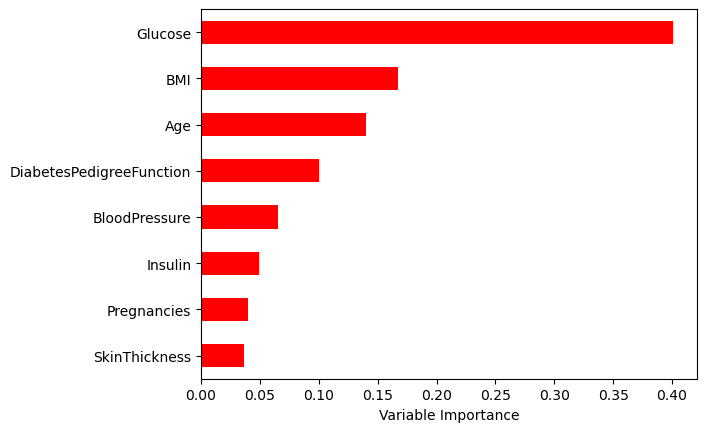

In [73]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

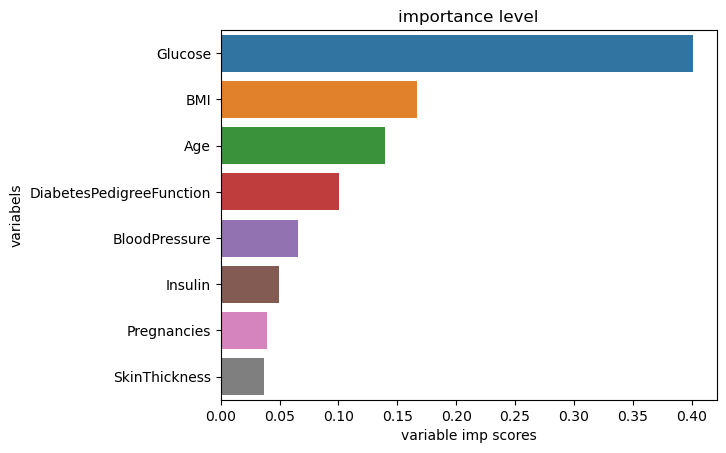

In [70]:
feature_imp = pd.Series(rf_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('variable imp scores')
plt.ylabel('variabels')
plt.title('importance level')
plt.show()